# Business problem

In [383]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Visual Studio
 - Importing two functions.
  - The ut function evaluates the amount of error between model's predication and the actual values for both train and test set
  - The rf function allows testing for the dependent variable with multiple variables or a single one.

In [384]:
# Created and imported from visual studio.
import utilities as ut
import regressionfunc as rf

In [385]:
!ls

CONTRIBUTING.md           Price_Floors.png          halfway-there.gif
Data exploration.ipynb    Price_Living.png          pairplor.png
Iron.ipynb                Price_PSQFT.png           price_floors_fit.png
LICENSE.md                Price_Year.png            price_sqft_living_fit.png
Price_Bath.png            README.md                 regressionfunc.py
Price_Bed.png             __pycache__               utilities.py
Price_Built.png           ap.png                    utlities.py
Price_Comp.png            data


# Data Exploration

In [395]:
df = pd.read_csv('data/kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [416]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [396]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [397]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Outliers

In [398]:
# Explore Categorical Columns
cat_cols = [c for c in df. columns if df[c].dtype == 'object']
df[cat_cols].describe()

date waterfront   view condition      grade sqft_basement
count       21597      19221  21534     21597      21597         21597
unique        372          2      5         5         11           304
top     6/23/2014         NO   NONE   Average  7 Average           0.0
freq          142      19075  19422     14020       8974         12826

waterfront, view has null values

In [399]:
# Check nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Train Test Split

In [417]:
X = df.drop(columns= ['price'])
y = df['price']
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [418]:
print('X_train:')
display(X_train.describe())
print('X_test:')
display(X_test.describe())

X_train:


id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  1.511700e+04  15117.000000  15117.000000  15117.000000  1.511700e+04   
mean   4.595181e+09      3.376001      2.119948   2087.040617  1.516938e+04   
std    2.889110e+09      0.909173      0.770233    922.643607  4.106372e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.115720e+09      3.000000      1.750000   1430.000000  5.070000e+03   
50%    3.905082e+09      3.000000      2.250000   1912.000000  7.623000e+03   
75%    7.340500e+09      4.000000      2.500000   2560.000000  1.075400e+04   
max    9.900000e+09     11.000000      8.000000  13540.000000  1.651359e+06   

             floors    sqft_above      yr_built  yr_renovated      zipcode  \
count  15117.000000  15117.000000  15117.000000  12418.000000  15117.00000   
mean       1.496362   1793.521598   1971.090825     82.781285  98078.17907   
std        0.540947    830.319679     29.339641    398.004042     53.58806   
min        1.000000    370.000000   1900.000000      0.000000  98001.00000   
25%        1.000000   1200.000000   1952.000000      0.000000  98033.00000   
50%        1.500000   1570.000000   1975.000000      0.000000  98065.00000   
75%        2.000000   2230.000000   1997.000000      0.000000  98118.00000   
max        3.500000   9410.000000   2015.000000   2015.000000  98199.00000   

                lat          long  sqft_living15     sqft_lot15    Price/SQFT  
count  15117.000000  15117.000000   15117.000000   15117.000000  15117.000000  
mean      47.560889   -122.213841    1990.058610   12854.456043    264.128596  
std        0.138218      0.141493     686.935438   27118.169894    110.471781  
min       47.155900   -122.519000     399.000000     651.000000     88.000000  
25%       47.471800   -122.329000    1490.000000    5102.000000    182.200420  
50%       47.573200   -122.231000    1840.000000    7625.000000    244.155844  
75%       47.678300   -122.125000    2360.000000   10088.000000    318.181818  
max       47.777600   -121.315000    6210.000000  871200.000000    810.138889

X_test:


id     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  6.480000e+03  6480.000000  6480.000000   6480.000000  6.480000e+03   
mean   4.546166e+09     3.366667     2.106211   2064.647840  1.493618e+04   
std    2.847585e+09     0.965111     0.766037    907.309873  4.221816e+04   
min    1.000102e+06     1.000000     0.750000    410.000000  6.090000e+02   
25%    2.131576e+09     3.000000     1.500000   1420.000000  5.001000e+03   
50%    3.885804e+09     3.000000     2.250000   1910.000000  7.590000e+03   
75%    7.234601e+09     4.000000     2.500000   2510.000000  1.050000e+04   
max    9.842300e+09    33.000000     7.750000  10040.000000  1.164794e+06   

            floors   sqft_above     yr_built  yr_renovated       zipcode  \
count  6480.000000  6480.000000  6480.000000   5337.000000   6480.000000   
mean      1.488812  1777.108025  1970.787037     85.627319  98077.421759   
std       0.536726   821.705862    29.459273    404.460305     53.338089   
min       1.000000   410.000000  1900.000000      0.000000  98001.000000   
25%       1.000000  1190.000000  1951.000000      0.000000  98032.750000   
50%       1.500000  1550.000000  1975.000000      0.000000  98065.000000   
75%       2.000000  2190.000000  1996.000000      0.000000  98117.000000   
max       3.500000  8860.000000  2015.000000   2015.000000  98199.000000   

               lat         long  sqft_living15     sqft_lot15   Price/SQFT  
count  6480.000000  6480.000000    6480.000000    6480.000000  6480.000000  
mean     47.558235  -122.214313    1978.599228   12533.925463   264.177829  
std       0.139321     0.138922     681.221783   27636.376894   108.900124  
min      47.162200  -122.515000     670.000000     659.000000    87.588235  
25%      47.469275  -122.327000    1480.000000    5068.250000   182.573123  
50%      47.569600  -122.229000    1830.000000    7610.000000   246.261669  
75%      47.677525  -122.126000    2360.000000   10075.750000   318.393345  
max      47.777500  -121.315000    5790.000000  858132.000000   792.682927

# Data Preparation

Depends on our Business Problem. For example, if our stakeholder is the single family whose trying to buy house, bedrooms > 6  usually is not single family house

In [402]:
X_train

id        date  bedrooms  bathrooms  sqft_living  sqft_lot  \
753    8682300890   8/28/2014         2       2.50         2380      6600   
1418   8073000550   4/15/2015         4       3.75         3190     17186   
8178   7212680850    9/3/2014         3       2.50         1730      6930   
2254   8880600070  11/12/2014         4       2.00         1870      8750   
4063   7226500100   2/19/2015         8       3.00         2850     12714   
...           ...         ...       ...        ...          ...       ...   
11964  7853230570   9/15/2014         3       2.50         2230      5800   
21575  4140940150   10/2/2014         4       2.75         2770      3852   
5390   8658300480   7/21/2014         4       1.50         1530      9000   
860    1723049033   6/20/2014         1       0.75          380     15000   
15795  8567450080   3/25/2015         4       2.50         2755     11612   

       floors waterfront       view condition          grade  sqft_above  \
753       1.0        NaN       NONE   Average         8 Good        2380   
1418      2.0        YES  EXCELLENT   Average   10 Very Good        3190   
8178      2.0         NO       NONE   Average         8 Good        1730   
2254      1.0         NO    AVERAGE   Average      7 Average        1870   
4063      1.0        NaN       NONE   Average      7 Average        2850   
...       ...        ...        ...       ...            ...         ...   
11964     2.0         NO       NONE   Average      7 Average        2230   
21575     2.0         NO       NONE   Average         8 Good        2770   
5390      1.0         NO       NONE      Good  6 Low Average        1530   
860       1.0         NO       NONE   Average         5 Fair         380   
15795     2.0         NO       NONE   Average         8 Good        2755   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
753             0.0      2010           NaN    98053  47.7170 -122.020   
1418            0.0      1999           0.0    98178  47.5115 -122.246   
8178            0.0      1994           0.0    98003  47.2621 -122.308   
2254            0.0      1977           0.0    98022  47.1985 -122.001   
4063            0.0      1959           0.0    98055  47.4859 -122.205   
...             ...       ...           ...      ...      ...      ...   
11964           0.0      2004           0.0    98065  47.5308 -121.847   
21575           0.0      2014           NaN    98178  47.5001 -122.232   
5390            0.0      1976           0.0    98014  47.6492 -121.908   
860             0.0      1963           0.0    98168  47.4810 -122.323   
15795           0.0      2001           0.0    98019  47.7394 -121.965   

       sqft_living15  sqft_lot15  
753             1870        6600  
1418            2290       13496  
8178            1780        6930  
2254            1770        8207  
4063            1480        4942  
...              ...         ...  
11964           2230        6088  
21575           1810        5641  
5390            1520        8500  
860             1170       15000  
15795           2820       12831  

[15117 rows x 20 columns]

In [403]:
X_test

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
3686   6303401050  2/20/2015         3       0.75          850      8573   
10247  1995200200  10/8/2014         3       1.00         1510      6083   
4037   1423089118  3/25/2015         4       2.25         1790     42000   
3437   9349900110  2/17/2015         2       1.50         1140      2500   
19291   455000395  5/23/2014         3       1.00         1500      3920   
...           ...        ...       ...        ...          ...       ...   
9400   1257202430  6/17/2014         4       3.50         2650      3060   
9092   7129301001  12/9/2014         4       2.75         2670      6780   
6650   3715500170  6/23/2014         3       1.75         1600     10280   
21095  7207900080   8/8/2014         5       3.50         2760      3865   
3372   1770000490  5/22/2014         2       1.75         1060     16470   

       floors waterfront  view  condition          grade  sqft_above  \
3686      1.0         NO  NONE    Average  6 Low Average         600   
10247     1.0         NO  NONE       Good  6 Low Average         860   
4037      1.0         NO  NONE    Average      7 Average        1170   
3437      1.0         NO  FAIR    Average      7 Average         630   
19291     1.0         NO  NONE    Average      7 Average        1000   
...       ...        ...   ...        ...            ...         ...   
9400      2.0         NO  NONE    Average       9 Better        2060   
9092      2.0         NO  GOOD  Very Good         8 Good        1630   
6650      1.0        NaN  NONE    Average      7 Average        1050   
21095     2.5         NO  NONE    Average         8 Good        2760   
3372      1.0         NO  NONE    Average      7 Average        1060   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
3686          250.0      1945           0.0    98146  47.5030 -122.356   
10247         650.0      1940           0.0    98115  47.6966 -122.324   
4037          620.0      1983           0.0    98045  47.4819 -121.744   
3437          510.0      1988           NaN    98106  47.5707 -122.359   
19291         500.0      1947           0.0    98107  47.6718 -122.359   
...             ...       ...           ...      ...      ...      ...   
9400          590.0      2001           0.0    98103  47.6735 -122.332   
9092         1040.0      1908           0.0    98118  47.5131 -122.256   
6650          550.0      1977           0.0    98034  47.7250 -122.174   
21095           0.0      2013           0.0    98056  47.5049 -122.170   
3372            0.0      1977           0.0    98072  47.7409 -122.089   

       sqft_living15  sqft_lot15  
3686             850        8382  
10247           1510        5712  
4037            2060       50094  
3437            1500        5000  
19291           1640        4017  
...              ...         ...  
9400            1470        3060  
9092            2400        5989  
6650            1590        8100  
21095           2590        4587  
3372            1790       16748  

[6480 rows x 20 columns]

## Pairplot
 - This is the description of the train/test.
 - The next step is to clean the data by elimination outliers and repair other statistically irrelevant cells.

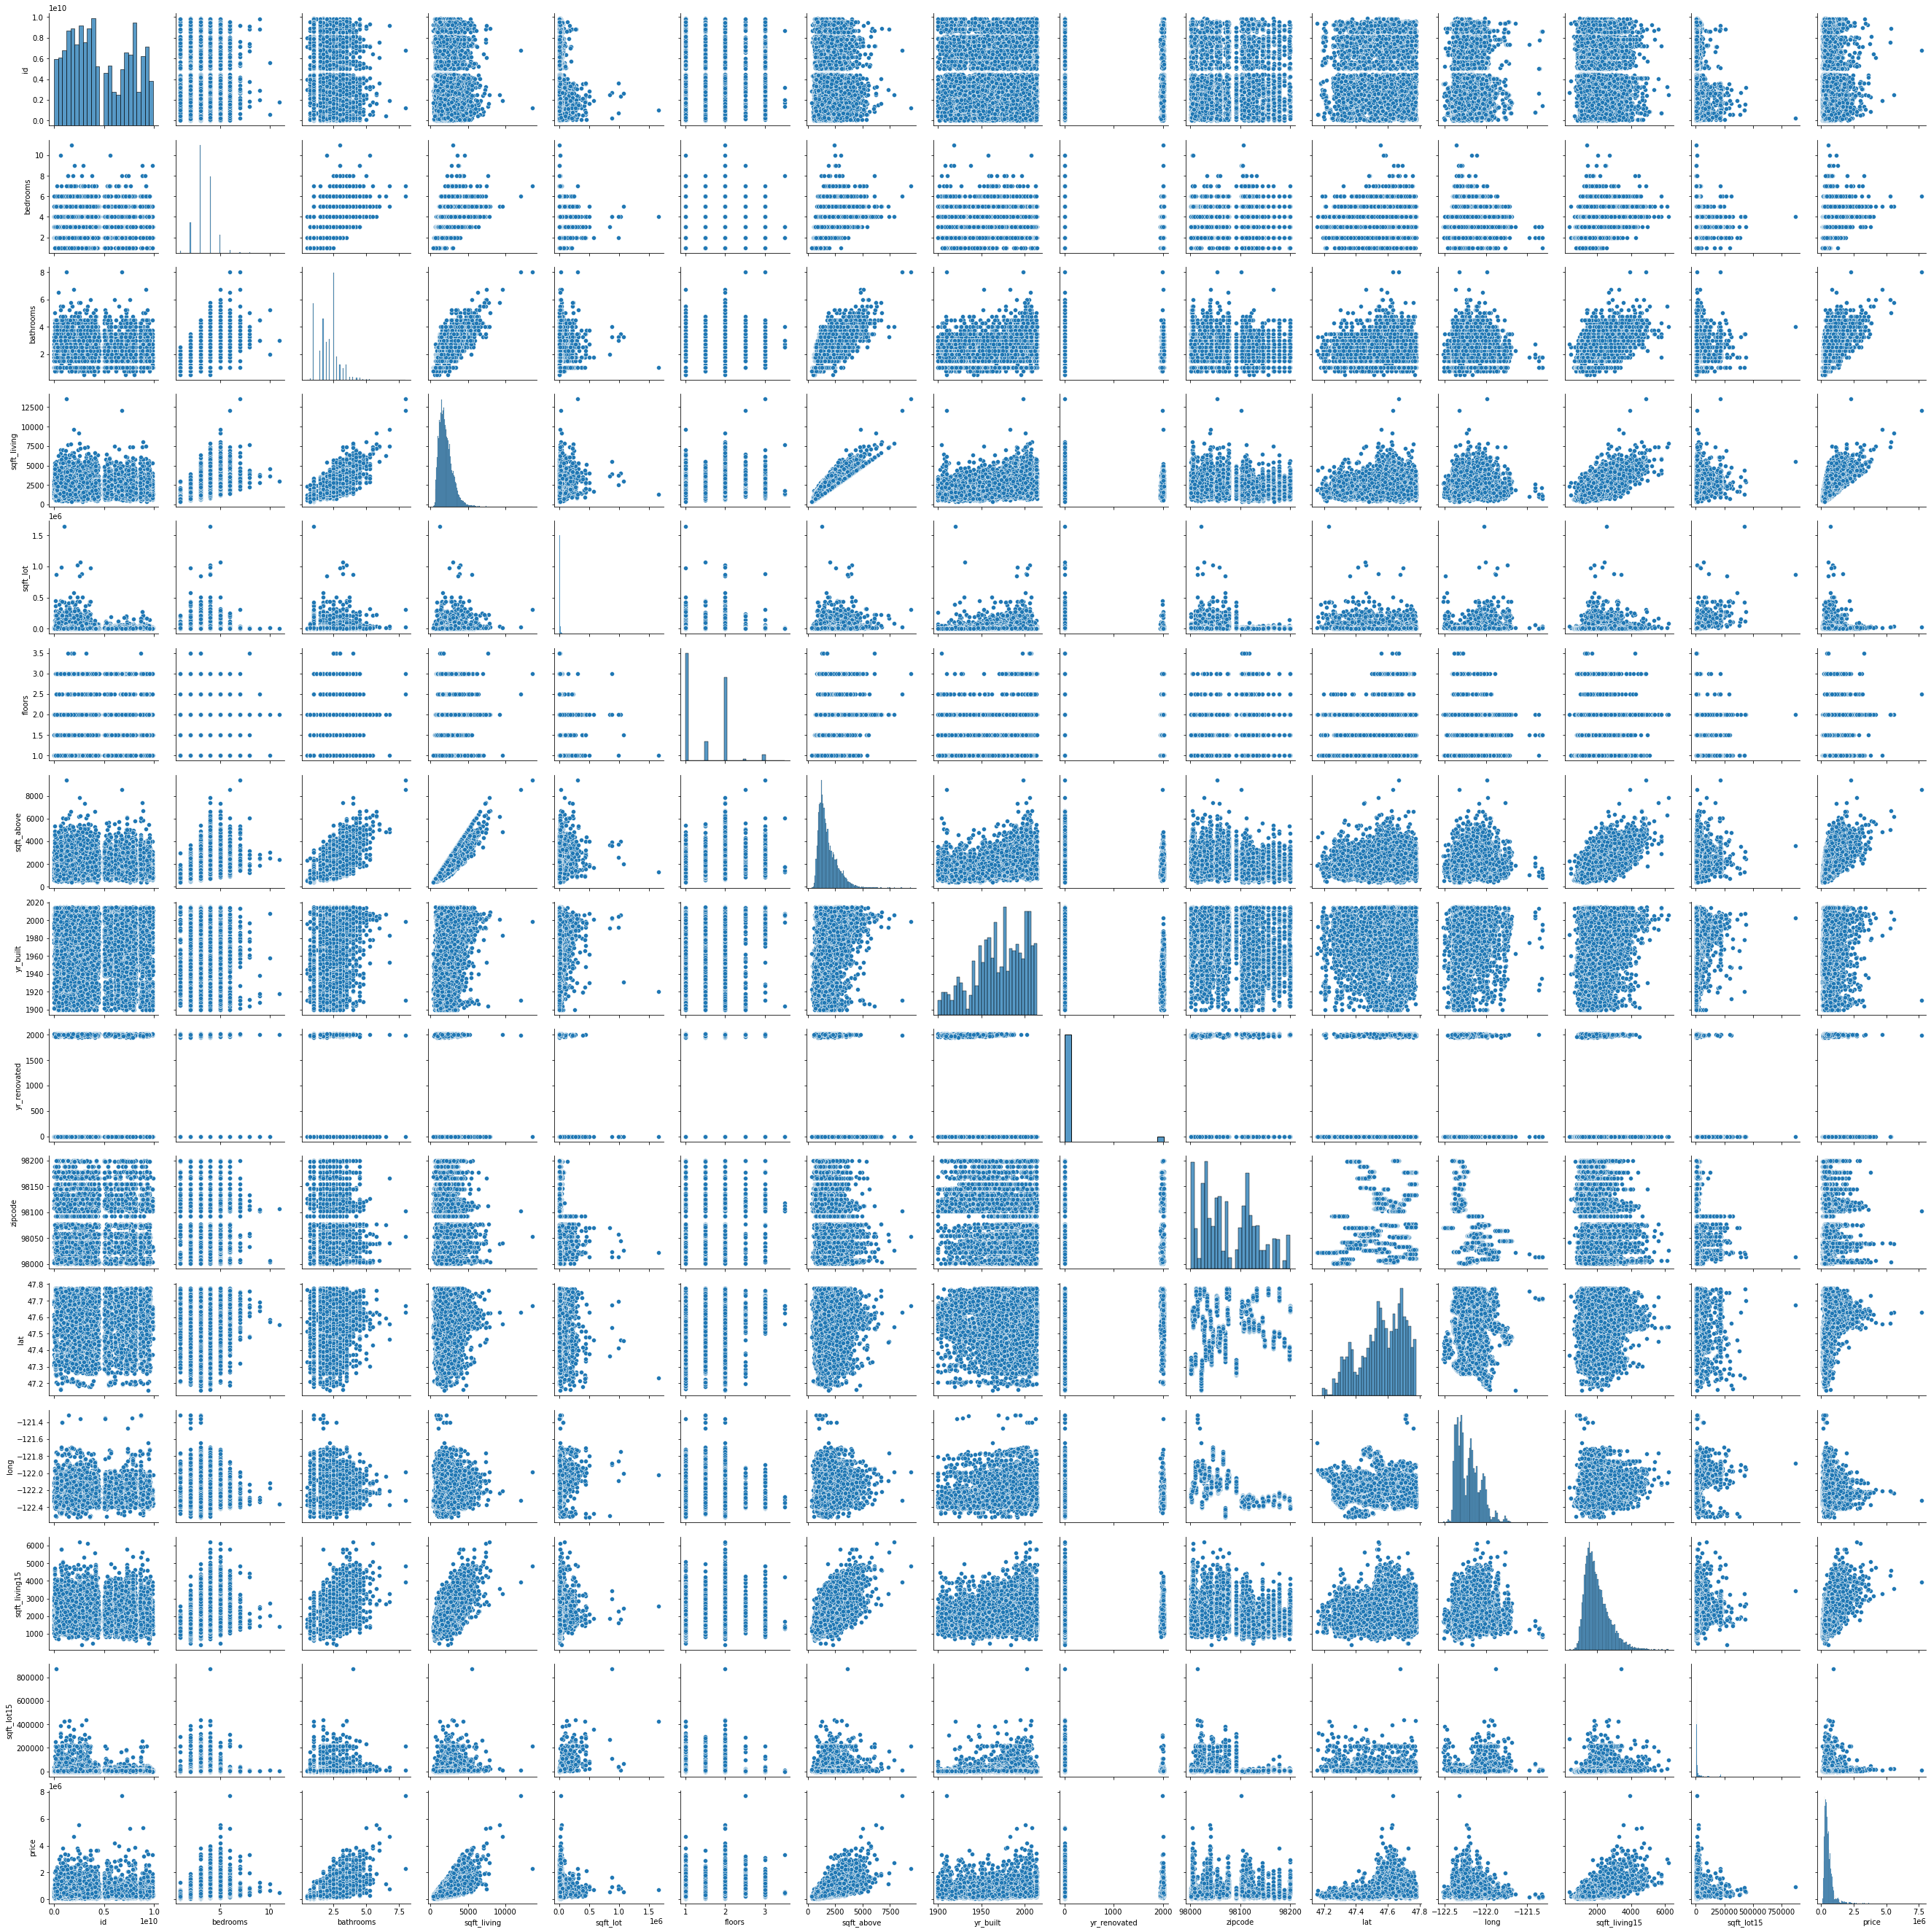

In [404]:
train_df = pd.concat([X_train, y_train], axis = 1)
sns.pairplot(train_df)

## Starting to Clean Data
 - Removing outliers from bedrooms.

In [405]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [410]:
df['Price/SQFT'] = df["price"] / df["sqft_living"]
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ... sqft_above sqft_basement  \
0          5650     1.0        NaN  NONE  ...       1180           0.0   
1          7242     2.0         NO  NONE  ...       2170         400.0   
2         10000     1.0         NO  NONE  ...        770           0.0   
3          5000     1.0         NO  NONE  ...       1050         910.0   
4          8080     1.0         NO  NONE  ...       1680           0.0   
...         ...     ...        ...   ...  ...        ...           ...   
21592      1131     3.0         NO  NONE  ...       1530           0.0   
21593      5813     2.0         NO  NONE  ...       2310           0.0   
21594      1350     2.0         NO  NONE  ...       1020           0.0   
21595      2388     2.0        NaN  NONE  ...       1600           0.0   
21596      1076     2.0         NO  NONE  ...       1020           0.0   

       yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955          0.0    98178  47.5112 -122.257           1340   
1          1951       1991.0    98125  47.7210 -122.319           1690   
2          1933          NaN    98028  47.7379 -122.233           2720   
3          1965          0.0    98136  47.5208 -122.393           1360   
4          1987          0.0    98074  47.6168 -122.045           1800   
...         ...          ...      ...      ...      ...            ...   
21592      2009          0.0    98103  47.6993 -122.346           1530   
21593      2014          0.0    98146  47.5107 -122.362           1830   
21594      2009          0.0    98144  47.5944 -122.299           1020   
21595      2004          0.0    98027  47.5345 -122.069           1410   
21596      2008          0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  Price/SQFT  
0            5650  188.050847  
1            7639  209.338521  
2            8062  233.766234  
3            5000  308.163265  
4            7503  303.571429  
...           ...         ...  
21592        1509  235.294118  
21593        7200  173.160173  
21594        2007  394.216667  
21595        1287  250.000000  
21596        1357  318.627451  

[21597 rows x 22 columns]

In [350]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

## Filtering for Single Family Homes

In [351]:
df["bedrooms"].between(2, 5, inclusive = True)
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

## Creating and Dropping Columns
 - Taking the log of:
  - To normalize the columns that are skewed.

In [359]:
df = df.drop(columns=['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])
df

id  bedrooms  bathrooms  floors waterfront  condition  \
0      7129300520         3       1.00     1.0        NaN    Average   
1      6414100192         3       2.25     2.0         NO    Average   
2      5631500400         2       1.00     1.0         NO    Average   
3      2487200875         4       3.00     1.0         NO  Very Good   
4      1954400510         3       2.00     1.0         NO    Average   
...           ...       ...        ...     ...        ...        ...   
21592   263000018         3       2.50     3.0         NO    Average   
21593  6600060120         4       2.50     2.0         NO    Average   
21594  1523300141         2       0.75     2.0         NO    Average   
21595   291310100         3       2.50     2.0        NaN    Average   
21596  1523300157         2       0.75     2.0         NO    Average   

               grade  yr_built  log_sqft_living  log_sqft_lot  log_price  
0          7 Average      1955         7.073270      8.639411  12.309982  
1          7 Average      1951         7.851661      8.887653  13.195614  
2      6 Low Average      1933         6.646391      9.210340  12.100712  
3          7 Average      1965         7.580700      8.517193  13.311329  
4             8 Good      1987         7.426549      8.997147  13.142166  
...              ...       ...              ...           ...        ...  
21592         8 Good      2009         7.333023      7.030857  12.793859  
21593         8 Good      2014         7.745003      8.667852  12.899220  
21594      7 Average      2009         6.927558      7.207860  12.904459  
21595         8 Good      2004         7.377759      7.778211  12.899220  
21596      7 Average      2008         6.927558      6.981006  12.691580  

[21597 rows x 11 columns]

In [358]:
df['log_sqft_living'] = np.log(df['sqft_living'])
df['log_sqft_lot'] = np.log(df['sqft_lot'])
df['log_price'] = np.log(df['price'])
df = df.drop(['price', 'sqft_living', 'sqft_lot'], axis = 1)
df

id        date  bedrooms  bathrooms  floors waterfront  view  \
0      7129300520  10/13/2014         3       1.00     1.0        NaN  NONE   
1      6414100192   12/9/2014         3       2.25     2.0         NO  NONE   
2      5631500400   2/25/2015         2       1.00     1.0         NO  NONE   
3      2487200875   12/9/2014         4       3.00     1.0         NO  NONE   
4      1954400510   2/18/2015         3       2.00     1.0         NO  NONE   
...           ...         ...       ...        ...     ...        ...   ...   
21592   263000018   5/21/2014         3       2.50     3.0         NO  NONE   
21593  6600060120   2/23/2015         4       2.50     2.0         NO  NONE   
21594  1523300141   6/23/2014         2       0.75     2.0         NO  NONE   
21595   291310100   1/16/2015         3       2.50     2.0        NaN  NONE   
21596  1523300157  10/15/2014         2       0.75     2.0         NO  NONE   

       condition          grade  sqft_above  ... yr_built  yr_renovated  \
0        Average      7 Average        1180  ...     1955           0.0   
1        Average      7 Average        2170  ...     1951        1991.0   
2        Average  6 Low Average         770  ...     1933           NaN   
3      Very Good      7 Average        1050  ...     1965           0.0   
4        Average         8 Good        1680  ...     1987           0.0   
...          ...            ...         ...  ...      ...           ...   
21592    Average         8 Good        1530  ...     2009           0.0   
21593    Average         8 Good        2310  ...     2014           0.0   
21594    Average      7 Average        1020  ...     2009           0.0   
21595    Average         8 Good        1600  ...     2004           0.0   
21596    Average      7 Average        1020  ...     2008           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  log_sqft_living  \
0        98178  47.5112 -122.257           1340        5650         7.073270   
1        98125  47.7210 -122.319           1690        7639         7.851661   
2        98028  47.7379 -122.233           2720        8062         6.646391   
3        98136  47.5208 -122.393           1360        5000         7.580700   
4        98074  47.6168 -122.045           1800        7503         7.426549   
...        ...      ...      ...            ...         ...              ...   
21592    98103  47.6993 -122.346           1530        1509         7.333023   
21593    98146  47.5107 -122.362           1830        7200         7.745003   
21594    98144  47.5944 -122.299           1020        2007         6.927558   
21595    98027  47.5345 -122.069           1410        1287         7.377759   
21596    98144  47.5941 -122.299           1020        1357         6.927558   

       log_sqft_lot  log_price  
0          8.639411  12.309982  
1          8.887653  13.195614  
2          9.210340  12.100712  
3          8.517193  13.311329  
4          8.997147  13.142166  
...             ...        ...  
21592      7.030857  12.793859  
21593      8.667852  12.899220  
21594      7.207860  12.904459  
21595      7.778211  12.899220  
21596      6.981006  12.691580  

[21597 rows x 21 columns]

## Filtering Columns
 - Getting rid of columns that don't help the regression model.

In [360]:
df = df.loc[df['log_price'] >= df['log_price'].mean() - 3 * df['log_price'].std()]
df = df.loc[df['log_price'] <= df['log_price'].mean() + 3 * df['log_price'].std()]
df

id  bedrooms  bathrooms  floors waterfront  condition  \
0      7129300520         3       1.00     1.0        NaN    Average   
1      6414100192         3       2.25     2.0         NO    Average   
2      5631500400         2       1.00     1.0         NO    Average   
3      2487200875         4       3.00     1.0         NO  Very Good   
4      1954400510         3       2.00     1.0         NO    Average   
...           ...       ...        ...     ...        ...        ...   
21592   263000018         3       2.50     3.0         NO    Average   
21593  6600060120         4       2.50     2.0         NO    Average   
21594  1523300141         2       0.75     2.0         NO    Average   
21595   291310100         3       2.50     2.0        NaN    Average   
21596  1523300157         2       0.75     2.0         NO    Average   

               grade  yr_built  log_sqft_living  log_sqft_lot  log_price  
0          7 Average      1955         7.073270      8.639411  12.309982  
1          7 Average      1951         7.851661      8.887653  13.195614  
2      6 Low Average      1933         6.646391      9.210340  12.100712  
3          7 Average      1965         7.580700      8.517193  13.311329  
4             8 Good      1987         7.426549      8.997147  13.142166  
...              ...       ...              ...           ...        ...  
21592         8 Good      2009         7.333023      7.030857  12.793859  
21593         8 Good      2014         7.745003      8.667852  12.899220  
21594      7 Average      2009         6.927558      7.207860  12.904459  
21595         8 Good      2004         7.377759      7.778211  12.899220  
21596      7 Average      2008         6.927558      6.981006  12.691580  

[21419 rows x 11 columns]

Lots of histograms are skewed. There are two options:
- Log transformation
- Eliminate outlier

In [373]:
X = df.drop(columns= ['id', 'log_price'])
y = df['log_price']
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [374]:
print('X_train:')
display(X_train.describe())
print('X_test:')
display(X_test.describe())

X_train:


bedrooms     bathrooms        floors      yr_built  \
count  14993.000000  14993.000000  14993.000000  14993.000000   
mean       3.372240      2.104015      1.491296   1971.082905   
std        0.931968      0.745653      0.539255     29.283964   
min        1.000000      0.500000      1.000000   1900.000000   
25%        3.000000      1.750000      1.000000   1952.000000   
50%        3.000000      2.250000      1.500000   1975.000000   
75%        4.000000      2.500000      2.000000   1997.000000   
max       33.000000      7.500000      3.500000   2015.000000   

       log_sqft_living  log_sqft_lot  
count     14993.000000  14993.000000  
mean          7.543871      8.980463  
std           0.415827      0.896066  
min           5.940171      6.349139  
25%           7.258412      8.524764  
50%           7.554859      8.934587  
75%           7.835975      9.261129  
max           8.952864     14.317109

X_test:


bedrooms    bathrooms       floors     yr_built  log_sqft_living  \
count  6426.000000  6426.000000  6426.000000  6426.000000      6426.000000   
mean      3.355120     2.102863     1.493075  1970.841737         7.546208   
std       0.894742     0.757916     0.538978    29.415113         0.416252   
min       1.000000     0.500000     1.000000  1900.000000         5.913503   
25%       3.000000     1.500000     1.000000  1952.000000         7.265430   
50%       3.000000     2.250000     1.500000  1975.000000         7.549609   
75%       4.000000     2.500000     2.000000  1996.000000         7.835975   
max       9.000000     6.750000     3.500000  2015.000000         8.919988   

       log_sqft_lot  
count   6426.000000  
mean       8.994724  
std        0.915351  
min        6.253829  
25%        8.522579  
50%        8.932939  
75%        9.279167  
max       13.839293

In [375]:
X_train

bedrooms  bathrooms  floors waterfront  condition          grade  \
5322          4       2.00     1.0         NO       Good      7 Average   
16933         3       2.00     1.5         NO       Good      7 Average   
18561         3       1.00     1.0         NO    Average      7 Average   
2599          2       1.00     1.0         NO  Very Good      7 Average   
18953         4       2.50     1.0         NO    Average         8 Good   
...         ...        ...     ...        ...        ...            ...   
11375         3       2.00     1.0         NO  Very Good  6 Low Average   
12061         3       2.00     2.0         NO    Average       9 Better   
5440          4       1.75     2.0         NO    Average      7 Average   
870           3       1.75     1.0         NO    Average      7 Average   
15923         3       2.25     1.0         NO    Average      7 Average   

       yr_built  log_sqft_living  log_sqft_lot  
5322       1958         7.432484      9.012865  
16933      1915         7.709757      8.476371  
18561      1957         6.791221      8.556414  
2599       1924         6.802395      7.975908  
18953      1949         7.992945     10.193991  
...         ...              ...           ...  
11375      1952         7.539027      9.283405  
12061      1999         7.605890      8.371011  
5440       1994         7.352441      8.364042  
870        1919         7.512071      8.333270  
15923      1964         7.635304      8.961879  

[14993 rows x 9 columns]

In [376]:
X_test

bedrooms  bathrooms  floors waterfront condition          grade  \
20011         4       3.25     2.0         NO   Average       9 Better   
16665         3       1.75     1.0         NO   Average      7 Average   
561           4       2.25     1.0         NO      Good         8 Good   
14412         3       1.00     1.5         NO      Good  6 Low Average   
6209          4       1.75     1.0        NaN      Good      7 Average   
...         ...        ...     ...        ...       ...            ...   
17547         4       3.50     2.0         NO   Average   10 Very Good   
12985         4       2.50     2.0        NaN   Average         8 Good   
15107         4       2.50     2.0         NO   Average      7 Average   
11782         4       2.50     2.0         NO   Average       9 Better   
52            3       1.75     1.0         NO      Good      7 Average   

       yr_built  log_sqft_living  log_sqft_lot  
20011      2014         8.080237      8.484257  
16665      1976         7.098376      8.728264  
561        1982         7.757906     12.287717  
14412      1903         6.684612      8.026170  
6209       1957         7.605890      9.062420  
...         ...              ...           ...  
17547      2006         8.177516      8.878776  
12985      2003         7.731931      8.434246  
15107      1997         7.770645      8.892062  
11782      1990         7.832014      9.169935  
52         1950         7.251345      8.313852  

[6426 rows x 9 columns]

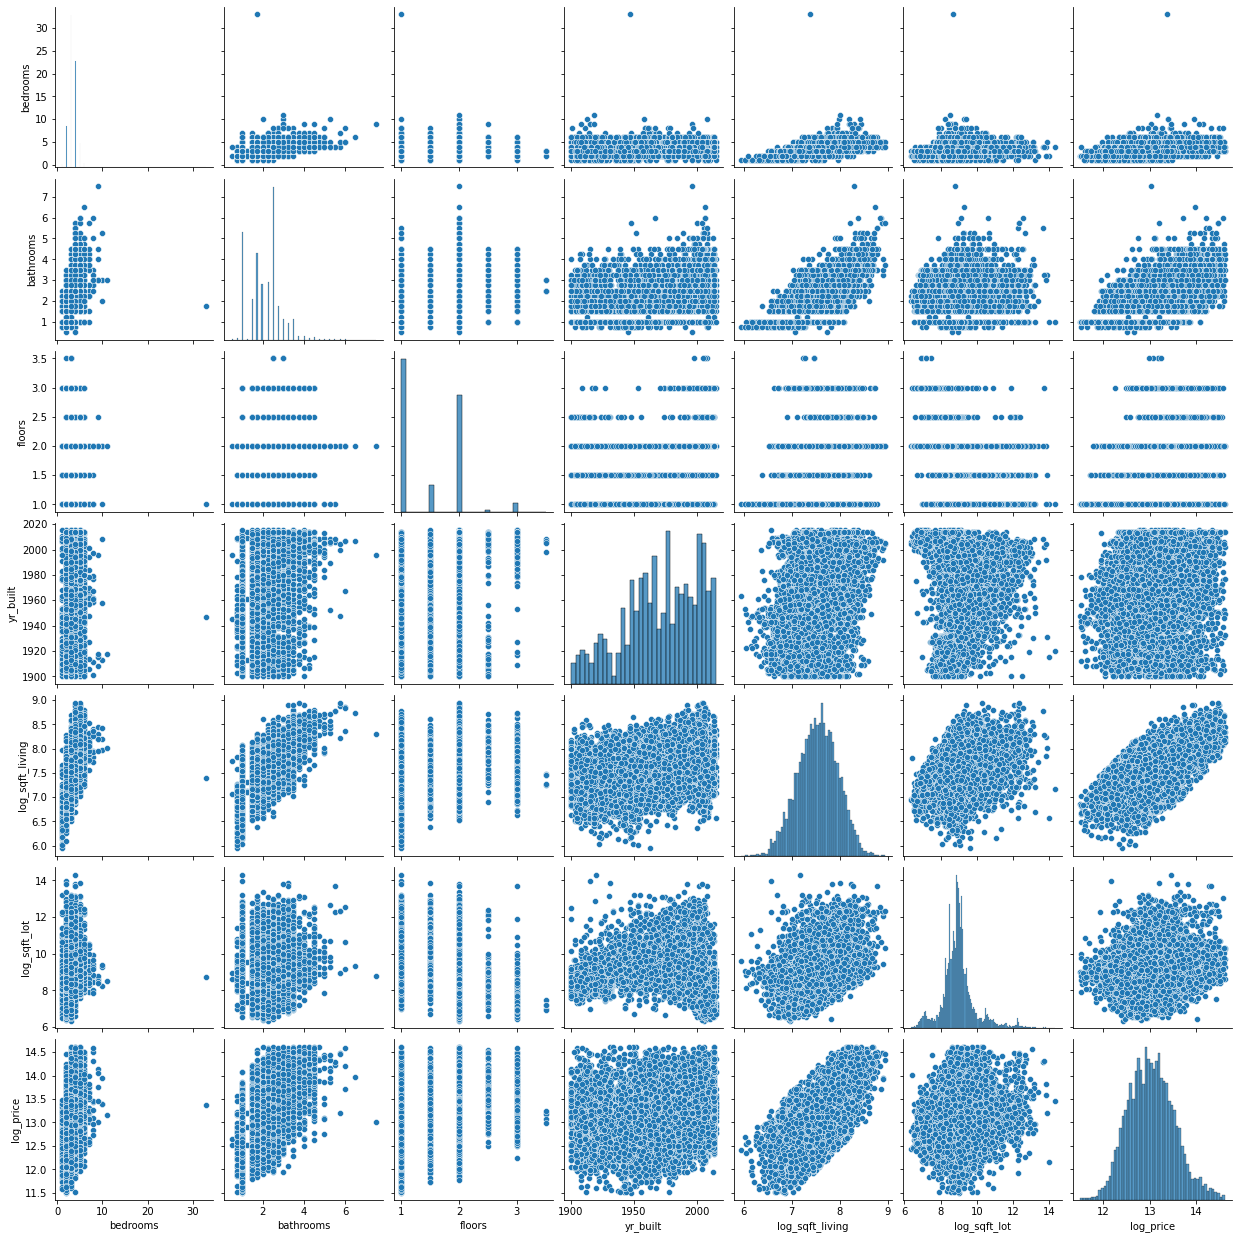

In [377]:
train_df = pd.concat([X_train, y_train], axis = 1)
sns.pairplot(train_df)

In [209]:
used_cols = [c for c in df.columns if c not in ['price', 'id', *cat_cols]]
num_cols = [c for c in df.columns if df[c].dtype in ['int64', 'float64']]

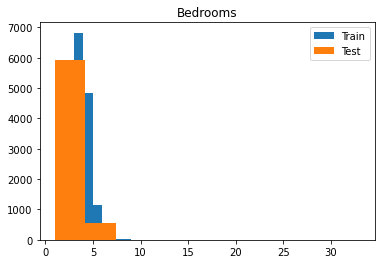

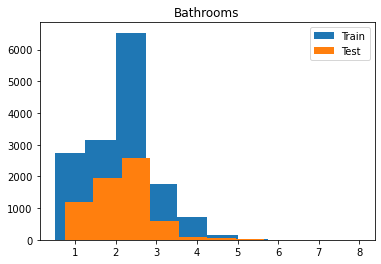

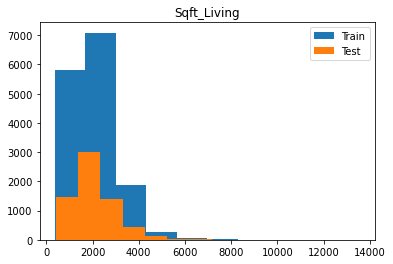

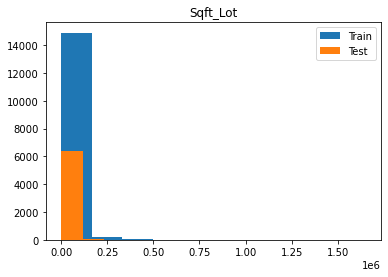

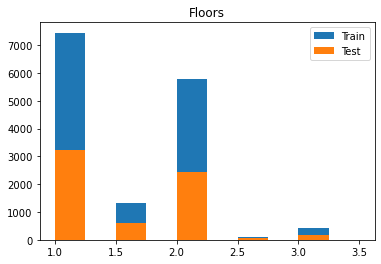

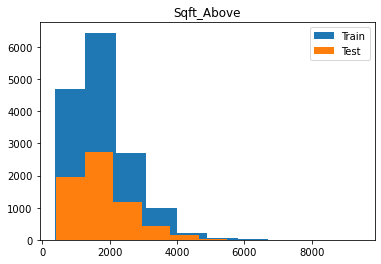

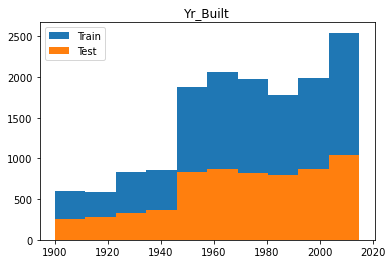

/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


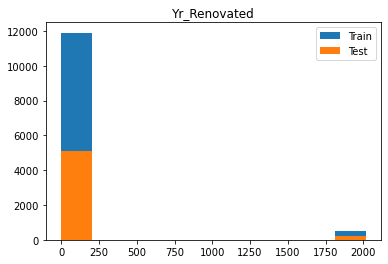

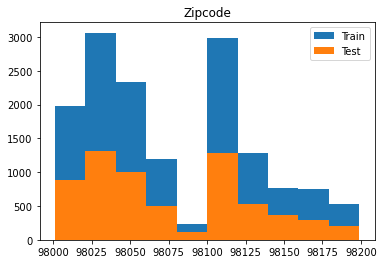

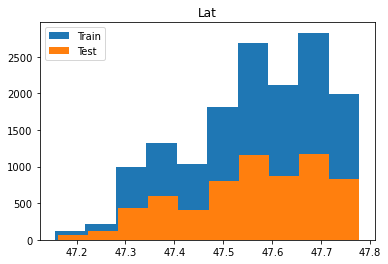

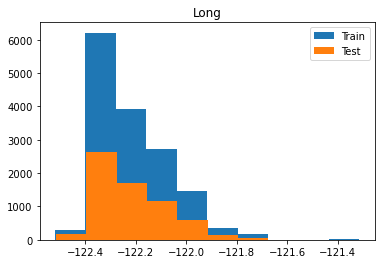

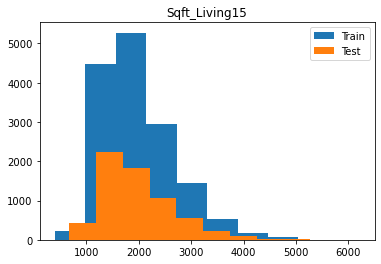

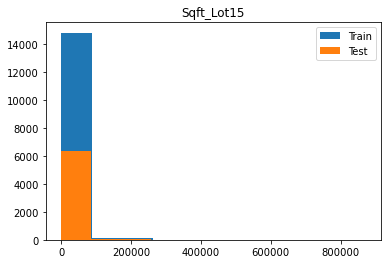

In [210]:
for col in used_cols:
    plt.hist(X_train[col], label= 'Train')
    plt.hist(X_test[col], label = 'Test')
    plt.title(f'{col.title()}')
    plt.legend()
    plt.show()

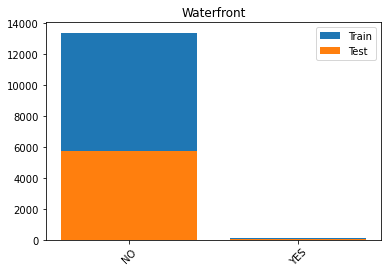

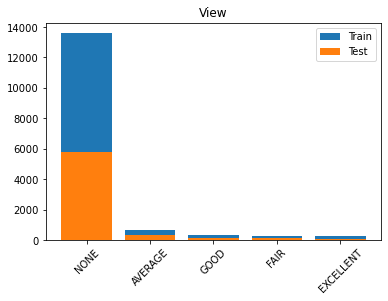

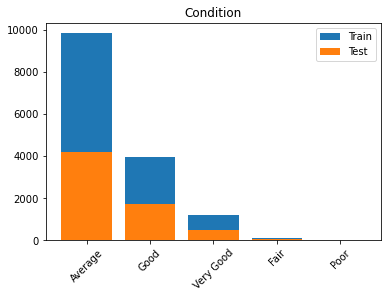

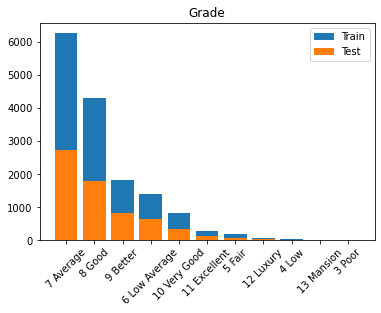

In [211]:
used_cols = [c for c in cat_cols if df[c].nunique() < 15]
for col in used_cols:
    train_values = X_train[col].value_counts()
    test_values = X_test[col].value_counts()
    plt.bar(train_values.index, train_values, label= 'Train')
    plt.bar(test_values.index, test_values, label = 'Test')
    plt.title(f'{col.title()}')
    plt.xticks(rotation= 45)
    plt.legend()
    plt.show()

<AxesSubplot:>

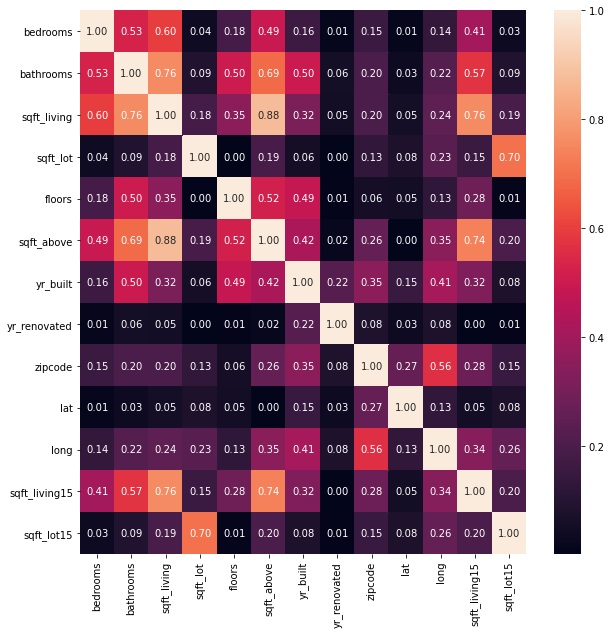

In [212]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

Several high multicollinearity 

<AxesSubplot:>

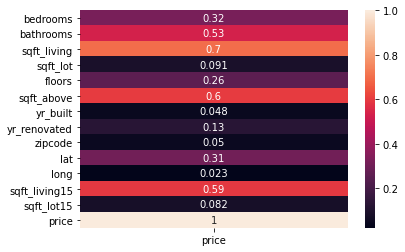

In [213]:
train_df = pd.concat([X_train, y_train], axis = 1)
sns.heatmap(train_df.corr()[['price']].abs(),annot=True)

Single => sqft_living 

# Baseline Understanding

In [214]:
# Define function that evaluate the amount of error between model's predication and the actual values for both train and test set
def evaluate(y_tr, tr_preds, y_te, te_preds):
    '''
    Evaluate the amount of error between model's predication and the actual values for both train and test set
    
    Inputs:
    y_tr = array like, actual values for 'price' for my train dataset
    y_te = array like, actaul values for 'price' for my test dataset
    tr_preds = array like, predicted values for 'price' for my train dataset
    te_preds = array like, predicted values for 'price' for my test dataset
    '''
    
    print(f'Train R2: {r2_score(y_tr, tr_preds)}')
    print(f'Test R2: {r2_score(y_te, te_preds)}')
    print('****')
    print(f'Train RMSE: ${mean_squared_error(y_tr, tr_preds,squared = False):,.2f}')
    print(f'Test RMSE: ${mean_squared_error(y_te, te_preds,squared=False):,.2f}')
    print('****')
    print(f'Train MAE: ${mean_absolute_error(y_tr, tr_preds):,.2f}')
    print(f'Test MAE: ${mean_absolute_error(y_te, te_preds):,.2f}')
    
    # Calculate Residual
    train_residuals = y_tr-tr_preds
    test_residuals = y_te-te_preds
    
    # Display Scatter Plot for Residual
    plt.scatter(tr_preds, train_residuals, label='Train')
    plt.scatter(te_preds, test_residuals, label='Test')
    plt.axhline(y=0, color='red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.show()

In [215]:
train_target_mean = y_train.mean()
train_target_mean

542036.6354435404

In [216]:
baseline_train_preds = [train_target_mean] * len(y_train)

baseline_test_preds = [train_target_mean] * len(y_test)

baseline_train_preds

[542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,


Train R2: 0.0
Test R2: -0.00025364584938625256
****
Train RMSE: $368,717.15
Test RMSE: $364,186.90
****
Train MAE: $235,842.04
Test MAE: $231,347.94


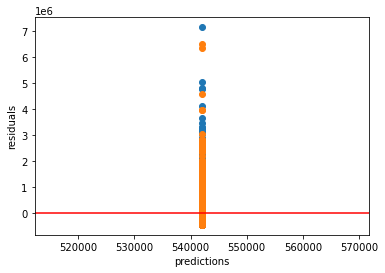

In [217]:
evaluate(y_train,baseline_train_preds,y_test,baseline_test_preds)

## Model 1.0

In [218]:
m1_X_train = X_train['sqft_living']

model1 = sm.OLS(y_train,sm.add_constant(m1_X_train)).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.465e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:35:40   Log-Likelihood:            -2.1009e+05
No. Observations:               15117   AIC:                         4.202e+05
Df Residuals:                   15115   BIC:                         4.202e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.311e+04   5285.915     -8.155      0.000   -5.35e+04   -3.27e+04
sqft_living   280.3702      2.316    121.033      0.000     275.830     284.911
==============================================================================
Omnibus:                     9707.719   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267176.166
Skew:                           2.649   Prob(JB):                         0.00
Kurtosis:                      22.902   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [380]:
def fit_n_run_model(var):
    xtr = X_train[var]
    xte = X_test[var]
    model = sm.OLS(y_train,sm.add_constant(xtr)).fit()
    trpreds = model.predict(sm.add_constant(xtr))
    tepreds = model.predict(sm.add_constant(xte))
    
    return model.summary()
    return evaluate(y_train, trpreds, y_test, tepreds)

In [381]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition',
       'grade', 'yr_built', 'log_sqft_living', 'log_sqft_lot', 'log_price'],
      dtype='object')

In [382]:
fit_n_run_model(['bedrooms', 'bathrooms']), evaluate(y_train, trpreds, y_test, tepreds)

NameError: name 'trpreds' is not defined

In [65]:
m1_X_test = X_test['sqft_living']
m1_train_preds = model1.predict(sm.add_constant(m1_X_train))
m1_test_preds = model1.predict(sm.add_constant(m1_X_test))

Train R2: 0.49217109776184653
Test R2: 0.4938282899234566
****
Train RMSE: $262,755.64
Test RMSE: $259,070.63
****
Train MAE: $174,832.93
Test MAE: $171,179.75


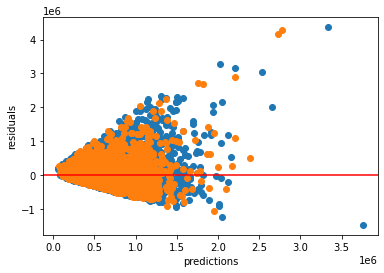

In [66]:
evaluate(y_train,m1_train_preds,y_test,m1_test_preds)

In [67]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Model 2.0
 - Bathrooms

In [68]:
m1_X_train = X_train['bathrooms']

model1 = sm.OLS(y_train,sm.add_constant(m1_X_train)).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     6055.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        06:57:58   Log-Likelihood:            -2.1267e+05
No. Observations:               15117   AIC:                         4.253e+05
Df Residuals:                   15115   BIC:                         4.254e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -738.9650   7421.097     -0.100      0.921   -1.53e+04    1.38e+04
bathrooms    2.56e+05   3290.185     77.817      0.000     2.5e+05    2.62e+05
==============================================================================
Omnibus:                    11105.122   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           392035.815
Skew:                           3.149   Prob(JB):                         0.00
Kurtosis:                      27.140   Cond. No.                         7.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
m1_X_test = X_test['bathrooms']
m1_train_preds = model1.predict(sm.add_constant(m1_X_train))
m1_test_preds = model1.predict(sm.add_constant(m1_X_test))

Train R2: 0.2860346980688918
Test R2: 0.2534730661462701
****
Train RMSE: $311,552.97
Test RMSE: $314,624.10
****
Train MAE: $204,801.35
Test MAE: $203,455.53


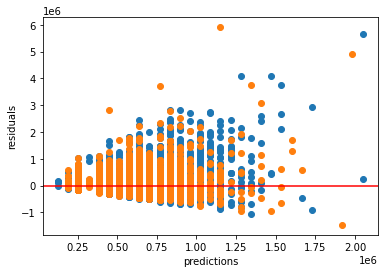

In [70]:
evaluate(y_train,m1_train_preds,y_test,m1_test_preds)

## Model 3.0
 - Bedrooms

In [72]:
m1_X_train = X_train['bedrooms']

model1 = sm.OLS(y_train,sm.add_constant(m1_X_train)).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1752.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        06:58:19   Log-Likelihood:            -2.1439e+05
No. Observations:               15117   AIC:                         4.288e+05
Df Residuals:                   15115   BIC:                         4.288e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.007e+05   1.09e+04      9.228      0.000    7.93e+04    1.22e+05
bedrooms    1.307e+05   3122.777     41.858      0.000    1.25e+05    1.37e+05
==============================================================================
Omnibus:                    12507.843   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           591243.336
Skew:                           3.682   Prob(JB):                         0.00
Kurtosis:                      32.739   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
m1_X_test = X_test['bedrooms']
m1_train_preds = model1.predict(sm.add_constant(m1_X_train))
m1_test_preds = model1.predict(sm.add_constant(m1_X_test))

Train R2: 0.10387700074005146
Test R2: 0.07327786207162557
****
Train RMSE: $349,041.57
Test RMSE: $350,545.20
****
Train MAE: $222,300.38
Test MAE: $219,461.38


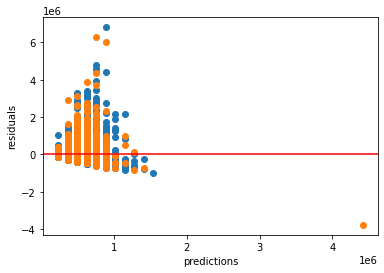

In [75]:
evaluate(y_train,m1_train_preds,y_test,m1_test_preds)